# cadCAD Experiment
Over 500 timesteps, money comes in to the system each timestep and is distributed to delegators according to the proportion of shares they have bought.  The share price and number are tied to a bonding curve.  

They purchase shares in the system according to their belief of the future revenue streams.

In [1]:
# if this crashes, run this:
# pip install ipython-autotime
%load_ext autotime
%load_ext autoreload
%autoreload 2
# import sys
# sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments

# from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline





time: 2.17 s (started: 2021-05-20 10:10:22 -04:00)


In [2]:
from model import run

running file: sim_setup.py
end of file: sim_setup.py
time: 1.78 s (started: 2021-05-20 10:10:24 -04:00)


In [3]:
df = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (90, 17, 1, 6)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 2.63s
time: 2.81 s (started: 2021-05-20 10:10:26 -04:00)


In [4]:
df

,reserve,supply,delegators,period_revenue,spot_price,GRT,simulation,subset,run,substep,timestep
7,40.00,20.00,{0: <model.parts.delegator.Delegator object at...,8.26,4.00,1000000.00,0,0,1,7,1
14,40.00,20.00,{0: <model.parts.delegator.Delegator object at...,2.44,4.00,1000000.00,0,0,1,7,2
21,51.48,22.69,{0: <model.parts.delegator.Delegator object at...,9.06,4.54,1000000.00,0,0,1,7,3
28,51.48,22.69,{0: <model.parts.delegator.Delegator object at...,2.65,4.54,1000000.00,0,0,1,7,4
35,51.48,22.69,{0: <model.parts.delegator.Delegator object at...,6.97,4.54,1000000.00,0,0,1,7,5
...,...,...,...,...,...,...,...,...,...,...,...
602,166.85,40.85,{0: <model.parts.delegator.Delegator object at...,8.62,8.17,1000000.00,0,0,1,7,86
609,172.35,41.51,{0: <model.parts.delegator.Delegator object at...,9.54,8.30,1000000.00,0,0,1,7,87
616,162.73,40.34,{0: <model.parts.delegator.Delegator object at...,0.07,8.07,1000000.00,0,0,1,7,88
623,170.88,41.34,{0: <model.parts.delegator.Delegator object at...,1.55,8.27,1000000.00,0,0,1,7,89


time: 125 ms (started: 2021-05-20 10:10:29 -04:00)


# Revenue coming in each period.  
## Mean is a parameter, currently 7
## It's exponentially distributed.

<AxesSubplot:>

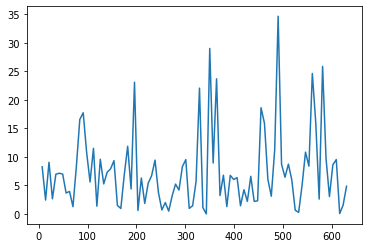

time: 391 ms (started: 2021-05-20 10:10:29 -04:00)


In [5]:
df.period_revenue.plot()

# Cumulative Claimed Rewards
This shows that the cumulative rewards continues to rise even though each delegator eventually leaves the system and their rewards become fixed.  They are of similar heights (ie. same rewards) because they all use the same policies to join and leave.

In [6]:
import pandas as pd
df1 = df.reset_index().delegators

delegator_revenue_token_holdings = {}
delegator_shares = {}
timestep = 0
for delegator_dict in df1:
    for delegator_id, delegator in delegator_dict.items():
        if delegator_id not in delegator_revenue_token_holdings:
            delegator_revenue_token_holdings[delegator_id] = {}
            delegator_shares[delegator_id] = {}
        delegator_revenue_token_holdings[delegator_id][timestep] = delegator.revenue_token_holdings
        delegator_shares[delegator_id][timestep] = delegator.shares
        
    timestep += 1

time: 110 ms (started: 2021-05-20 10:10:29 -04:00)


# Shares broken down by Delegator

Text(0, 0.5, 'Delegator Shares')

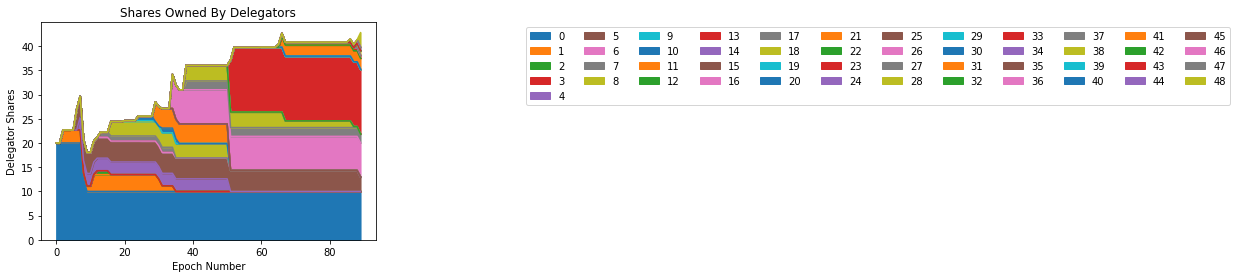

time: 1.33 s (started: 2021-05-20 10:10:29 -04:00)


In [7]:


df_plot = pd.DataFrame(delegator_shares)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Shares Owned By Delegators')
plt.xlabel('Epoch Number')
plt.ylabel('Delegator Shares')

# Cumulative Revenue Token Holdings



Text(0, 0.5, 'Revenue Token Holdings')

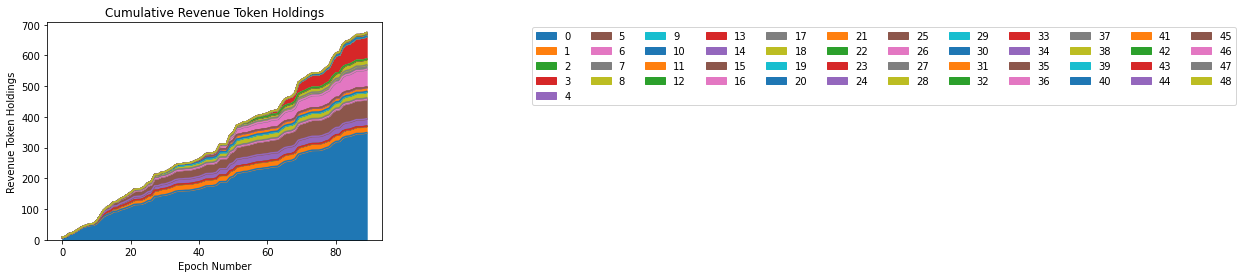

time: 1.53 s (started: 2021-05-20 10:10:31 -04:00)


In [8]:
df_plot = pd.DataFrame(delegator_revenue_token_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Cumulative Revenue Token Holdings')
plt.xlabel('Epoch Number')
plt.ylabel('Revenue Token Holdings')

Exploratory data analysis

In [9]:
df['shareholders'] = df.delegators.apply(lambda x: [k for k in x.keys() if x[k].shares>0] )

time: 204 ms (started: 2021-05-20 10:10:32 -04:00)


In [10]:
df['shares'] = df.delegators.apply(lambda x: [x[k].shares for k in x.keys() if x[k].shares>0] )

time: 110 ms (started: 2021-05-20 10:10:33 -04:00)


In [11]:
# cannot currently do this but i want to for plotting purposes
df['private_prices'] = df.delegators.apply(lambda x: [x[k].private_prices for k in x.keys()] )

time: 94 ms (started: 2021-05-20 10:10:33 -04:00)


In [12]:
df_list = []
for t in range(len(df)):
    temp_df = pd.DataFrame({'shareholder':df.shareholders.iloc[t] , 'shares':df.shares.iloc[t]})
    temp_df['Epoch Number'] = t

    df_list.append(temp_df)

shareholder_df = pd.concat(df_list)

time: 219 ms (started: 2021-05-20 10:10:33 -04:00)


In [13]:
shareholder_df

,shareholder,shares,Epoch Number
0,0,20.00,0
0,0,20.00,1
0,0,20.00,2
1,1,2.69,2
0,0,20.00,3
...,...,...,...
6,31,2.28,89
7,33,0.61,89
8,38,1.00,89
9,44,0.67,89


time: 94 ms (started: 2021-05-20 10:10:33 -04:00)


# Price per share

<AxesSubplot:>

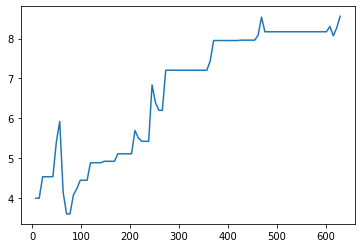

time: 297 ms (started: 2021-05-20 10:10:33 -04:00)


In [14]:
df.spot_price.plot()

In [15]:
df['period_revenue_per_share'] = df.period_revenue/df.supply

time: 78 ms (started: 2021-05-20 10:10:34 -04:00)


# Revenue per share 

<AxesSubplot:>

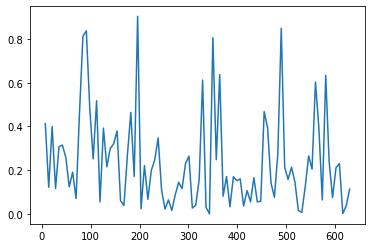

time: 281 ms (started: 2021-05-20 10:10:34 -04:00)


In [16]:
df.period_revenue_per_share.plot()

# Estimated Share Valuation

In [17]:
#estimated share valuation
risk_adj = .7 #if agents get their own param then there exists an estimated value of this system level param
discount_factor = .95 #if agents get their own param there exist an estimated value of this systel level param

df['share_valuation'] = df.spot_price * risk_adj + df.period_revenue_per_share / (1 - discount_factor)
df['ewm_share_valuation'] = df.share_valuation.ewm(halflife = 10).mean()

time: 78 ms (started: 2021-05-20 10:10:34 -04:00)


<AxesSubplot:xlabel='timestep'>

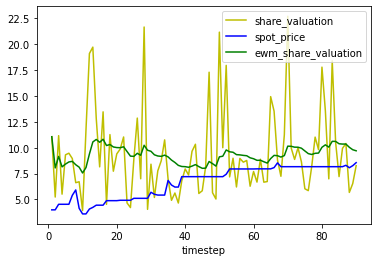

time: 360 ms (started: 2021-05-20 10:10:34 -04:00)


In [18]:
df[['share_valuation', 'spot_price', 'ewm_share_valuation', 'timestep']].plot(x='timestep', color='ybg')

In [19]:
df.columns

Index(['reserve', 'supply', 'delegators', 'period_revenue', 'spot_price',
       'GRT', 'simulation', 'subset', 'run', 'substep', 'timestep',
       'shareholders', 'shares', 'private_prices', 'period_revenue_per_share',
       'share_valuation', 'ewm_share_valuation'],
      dtype='object')

time: 94 ms (started: 2021-05-20 10:10:35 -04:00)


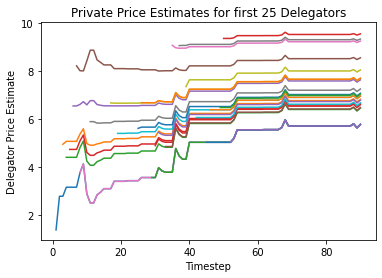

time: 328 ms (started: 2021-05-20 10:10:35 -04:00)


In [20]:
import matplotlib.pylab as plt

for i in range(0,25):
   
    d = df['private_prices'][630][i]

    lists = sorted(d.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.plot(x, y)
plt.title('Private Price Estimates for first 25 Delegators')
plt.ylabel('Delegator Price Estimate')
plt.xlabel('Timestep')

plt.show()